<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Boosting" data-toc-modified-id="Boosting-1">Boosting</a></span></li><li><span><a href="#1.-AdaBoost" data-toc-modified-id="1.-AdaBoost-2">1. AdaBoost</a></span><ul class="toc-item"><li><span><a href="#1.1-AdaBoost-原理" data-toc-modified-id="1.1-AdaBoost-原理-2.1">1.1 AdaBoost 原理</a></span></li><li><span><a href="#1.2-Python-实现" data-toc-modified-id="1.2-Python-实现-2.2">1.2 Python 实现</a></span></li><li><span><a href="#1.3-Sklearn-实现" data-toc-modified-id="1.3-Sklearn-实现-2.3">1.3 Sklearn 实现</a></span></li></ul></li><li><span><a href="#2.-梯度提升" data-toc-modified-id="2.-梯度提升-3">2. 梯度提升</a></span><ul class="toc-item"><li><span><a href="#2.1-梯度提升回归树（GBRT）" data-toc-modified-id="2.1-梯度提升回归树（GBRT）-3.1">2.1 梯度提升回归树（GBRT）</a></span><ul class="toc-item"><li><span><a href="#2.1.1-Python-实现" data-toc-modified-id="2.1.1-Python-实现-3.1.1">2.1.1 Python 实现</a></span></li><li><span><a href="#2.1.2-Sklearn-实现" data-toc-modified-id="2.1.2-Sklearn-实现-3.1.2">2.1.2 Sklearn 实现</a></span></li><li><span><a href="#2.1.3-早期停止法" data-toc-modified-id="2.1.3-早期停止法-3.1.3">2.1.3 早期停止法</a></span></li><li><span><a href="#2.1.4-随机梯度提升" data-toc-modified-id="2.1.4-随机梯度提升-3.1.4">2.1.4 随机梯度提升</a></span></li></ul></li></ul></li><li><span><a href="#参考资料" data-toc-modified-id="参考资料-4">参考资料</a></span></li></ul></div>

相关文章：

[机器学习 | 目录](https://blog.csdn.net/weixin_45488228/article/details/99691709)

[监督学习 | 集成学习之Bagging、随机森林及Sklearn实现](https://blog.csdn.net/weixin_45488228/article/details/100013912)

# Boosting

`提升法`（Boosting，最初被称为假设提升法）是指可以将几个弱学习器结合成一个强学习器的任意集成方法。大多数提升法的总体思路是循环训练预测器，每一次都对其前序做出一些改正。可用的提升法有很多，但目前最流行的方法是`AdaBoost`（Adaptive Boosting，自适应提升法）和`梯度提升`。

# 1. AdaBoost

新预测器对其前序进行纠正的方法之一，就是更多地关注前序拟合不足的训练实例。从而使新的预测器不断地越来越专注于难缠的问题，这就是 `AdaBoost` 使用的技术。

例如要构建一个 AdaBoost 分类器，首先需要训练一个基础分类器（比如决策树），用它对训练集进行预测，然后对错误分类的训练实例增加其相对权重。接着，使用这个新的权重对第二个分类器进行训练，然后再次对训练集进行预测，继续更新权重，并不断循环前进。<sup>[1]

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-22 at 14.35.20.png" width="520" >

<center> 图1 AdaBoost 循环训练，实例权重不断更新</center>

## 1.1 AdaBoost 原理

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-22 at 18.00.48.png" width="720" >

<center> 图1 AdaBoost 算法伪代码</center>

`AdaBoost` 有多种推导方式，比较容易理解的是基于“加线性模型”（additive model），即基学习器 $h$ 的线性组合：

$$H(x)=\sum_{t=1}^T \alpha_t h_t(x) \tag{1}$$

来最小化`指数损失函数`（exponential loss function）：

$$\ell_{exp}(H|D)=E_{x\sim D}[e^{-f(x)H(x)}] tag{2}$$

***

若 $H(x)$ 能令指数损失函数最小化，则考虑公式 (2) 对 $H(x)$ 的偏导：

$$
\frac{\partial \ell_{\exp }(H | \mathcal{D})}{\partial H(\boldsymbol{x})}=-e^{-H(\boldsymbol{x})} P(f(\boldsymbol{x})=1 | \boldsymbol{x})+e^{H(\boldsymbol{x})} P(f(\boldsymbol{x})=-1 | \boldsymbol{x}) \tag{3}
$$

令公式 (3) 为零可解得：

$$H(x)=\frac{1}{2}ln\frac{P(f(x)=1|x)}{P(f(x)=-1|x)} \tag{4}$$

因此有：

$$
\begin{aligned} \operatorname{sign}(H(\boldsymbol{x})) 
&=\operatorname{sign}\left(\frac{1}{2} \ln \frac{P(f(x)=1 | \boldsymbol{x})}{P(f(x)=-1 | \boldsymbol{x})}\right) \\ 
&=\left
\{\begin{array}{ll}{1,} & {P(f(x)=1 | \boldsymbol{x})>P(f(x)=-1 | \boldsymbol{x})} \\ 
{-1,} & {P(f(x)=1 | \boldsymbol{x})>P(f(x)=-1 | \boldsymbol{x})} \\ 
\end{array}\right.\\
& {=\underset{y \in\{-1,1\}}{\arg \max } P(f(x)=y | \boldsymbol{x})}
\end{aligned} \tag{5}
$$

这意味着 $sign(H(x))$ 达到了贝叶斯最优错误率。换言之，若`指数损失函数`最小化，则分类错误率也将最小化；这说明指数损失函数是分类问题原本`0/1 损失函数`的**一致替代损失函数**。由于这个替代函数是连续可微的，因此我们用它代替 0/1 损失函数作为优化目标。

***

在 AdaBoost 算法中，第一个基分类器 $h_1$ 是通过直接将基学习器用于初始数据分布而得；此后迭代地生成 $h_t$ 和 $\alpha_t$，当基分类器 $h_t$ 基于分布 $D_t$ 产生后，该基分类器的权重 $\alpha_t$ 应使得 $\alpha_th_t$ 最小化指数损失函数：

$$
\begin{aligned} \ell_{\exp }\left(\alpha_{t} h_{t} | \mathcal{D}_{t}\right) &=\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}_{t}}\left[e^{-f(\boldsymbol{x}) \alpha_{t} h_{t}(\boldsymbol{x})}\right] \\ &=\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}_{t}}\left[e^{-\alpha_{t}} \mathbb{I}\left(f(\boldsymbol{x})=h_{t}(\boldsymbol{x})\right)+e^{\alpha_{t}} \mathbb{I}\left(f(\boldsymbol{x}) \neq h_{t}(\boldsymbol{x})\right)\right] \\ &=e^{-\alpha_{t}} P_{\boldsymbol{x} \sim \mathcal{D}_{t}}\left(f(\boldsymbol{x})=h_{t}(\boldsymbol{x})\right)+e^{\alpha_{t}} P_{\boldsymbol{x} \sim \mathcal{D}_{t}}\left(f(\boldsymbol{x}) \neq h_{t}(\boldsymbol{x})\right) \\ &=e^{-\boldsymbol{\alpha}_{t}}\left(1-\epsilon_{t}\right)+e^{\alpha_{t}} \epsilon_{t} \end{aligned} \tag{6}
$$

其中 $\epsilon_t=P_{x\sim D(t)}(h_t(x) \neq f(x))$ 。考虑指数损失函数的导数：

$$\frac{\partial \ell(\alpha_th_t|D_t)}{\partial \alpha_t}=-e^{\alpha_t}(1-\epsilon_t)+e^{\alpha_t}\epsilon_t \tag{7}$$

令公式 (7) 为零得：

$$\alpha_t=\frac{1}{2}ln\bigg(\frac{1-\epsilon_t}{\epsilon_t}\bigg) \tag{8}$$

即 AdaBoost 算法第六行中的`分类器权重更新公式`。

AdaBoost 算法在活得 $H_{t-1}$ 之后的样本分布将进行调整，使下一轮的基学习器 $h_t$ 能纠正 $H_{t-1}$ 的一些错误。理想的 $h_t$ 能纠正 $H_{t-1}$ 的全部错误，即最小化

$$
\begin{aligned} \ell_{\exp }\left(H_{t-1}+h_{t} | \mathcal{D}\right) 
& \simeq \mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(x)(H_{t-1}(x)+h_t(x))}\right] \\ 
&=\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(x)H_{t-1}(x)}e^{-f(x)h_t(x)}\right] \end{aligned} \tag{9}
$$

注意到 $f^2(x)=h_t^2(x)=1$，式 (9) 可以使用 $e^{-f(x)h_t(x)}$ 的泰勒展开式近似为：

$$
\begin{aligned} \ell_{\exp }\left(H_{t-1}+h_{t} | \mathcal{D}\right) 
& \simeq \mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})}\left(1-f(\boldsymbol{x}) h_{t}(\boldsymbol{x})+\frac{f^{2}(\boldsymbol{x}) h_{t}^{2}(\boldsymbol{x})}{2}\right)\right] \\ 
&=\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})}\left(1-f(\boldsymbol{x}) h_{t}(\boldsymbol{x})+\frac{1}{2}\right)\right] \end{aligned} \tag{10}
$$

于是，理想的基学习器

$$
\begin{aligned}
h_t(x)&=\underset{h}{\arg \min }  \ell_{exp}(H_{t-1}+h|D)\\
&=\underset{h}{\arg \min } \mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})}\left(1-f(\boldsymbol{x}) h(\boldsymbol{x})+\frac{1}{2}\right)\right] \\ &=\underset{h}{\arg \max } \mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})} f(\boldsymbol{x}) h(\boldsymbol{x})\right] \\ 
&=\underset{h}{\arg \max } \mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[\frac{e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})}}{\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{\left.-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})\right]}\right.} f(\boldsymbol{x}) h(\boldsymbol{x})\right]
\end{aligned} \tag{11}
$$

注意到 $E_{x \sim D}[e^{-f(x)H_{t-1}(x)}]$ 是一个常数。令 $D_t$ 表示一个分布：

$$
\mathcal{D}_{t}(\boldsymbol{x})=\frac{\mathcal{D}(\boldsymbol{x}) e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})}}{\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})}\right]} \tag{12}
$$

则根据数学期望的定义，这等价于令

$$
\begin{aligned} h_{t}(\boldsymbol{x}) &=\underset{h}{\arg \max } \mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[\frac{e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})}}{\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})}\right]} f(\boldsymbol{x}) h(\boldsymbol{x})\right] \\ &=\underset{h}{\arg \max } \mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}_{t}}[f(\boldsymbol{x}) h(\boldsymbol{x})] \end{aligned} \tag{13}
$$

由 $f(x),h(x)\in \{-1,+1\}$ ，有

$$
f(\boldsymbol{x}) h(\boldsymbol{x})=1-2 \mathbb{I}(f(\boldsymbol{x}) \neq h(\boldsymbol{x})) \tag{14}
$$

由此可见，理想的 $h_t$ 将在分布 $D_t$ 下**最小化分类误差**，因此，弱分类器将给予分布 $D_t$ 来训练，且针对 $D_t$ 的分类误差应小于 0.5 。这在一定程度上类似“残差逼近”的思想。考虑到 $D_t$ 和 $D_{t+1}$ 的关系，有

$$
\begin{aligned} \mathcal{D}_{t+1}(\boldsymbol{x}) &=\frac{\mathcal{D}(\boldsymbol{x}) e^{-f(\boldsymbol{x}) H_{t}(\boldsymbol{x})}}{\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{\left.-f(\boldsymbol{x}) H_{t}(\boldsymbol{x})\right]}\right.} \\ &=\frac{\mathcal{D}(\boldsymbol{x}) e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})} e^{-f(\boldsymbol{x}) \alpha_{t} h_{t}(\boldsymbol{x})}}{\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(\boldsymbol{x}) H_{t}(\boldsymbol{x})}\right]} \\ &=\mathcal{D}_{t}(\boldsymbol{x}) \cdot e^{-f(\boldsymbol{x}) \alpha_{t} h_{t}(\boldsymbol{x})} \frac{\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(\boldsymbol{x}) H_{t-1}(\boldsymbol{x})}\right]}{\mathbb{E}_{\boldsymbol{x} \sim \mathcal{D}}\left[e^{-f(\boldsymbol{x}) H_{t}(\boldsymbol{x})}\right]} \end{aligned} \tag{15}
$$

这恰是 AdaBoost 算法第 7 行的`样本分布更新公式`。

Boosting 算法要求基学习器能对特定的数据分布进行学习，这可通过“`重赋权法`”（ re-weighting）实施，即在训练过程的每一轮中，根据样本分布为**每个训练样本重新赋予一个权重**。

对无法接受带权样本的基学习算法，则可通过“`重采样法`”（ re-sampling）来处理，即在每一轮学习中，根据样本分布**对训练集重新进行采样**，再用重采样而得的样本集对基学习器进行训练。

一般而言，这两种做法没有显著的优劣差别，需注意的是，Boostig 算法在训练的每一轮都要检查当前生成的基学习器是否满足基本条件（图 1 第 5 行，检査当前基分类器是否是比随机猜测好），一旦条件不满足，则当前基学习器即被抛弃，且学习过程停止。在此种情形下，初始设置的学习轮数也许还远未达到，可能导致最终集成中只包含很少的基学习器而性能不佳。若采用“重采样法”，则可获得“**重启动**”机会以避免训练过程过早停止，即在抛弃不满足条件的当前基学习器之后，可根据当前分布重新对训练样本进行采样，再基于新的采样结果重新训练出基学习器，从而使得学习过程可以持续到预设的 T 轮完成。

从偏差一方差分解的角度看， Boosting 主要关注降低偏差，因此 Boosting 能基于泛化性能相当弱的学习器构建出很强的集成。<sup>[2]

## 1.2 Python 实现

下面使用 5 个连续的 SVM （RBF 核、高度正则化）分类器对卫星数据进行预测。

In [10]:
# 导入数据
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

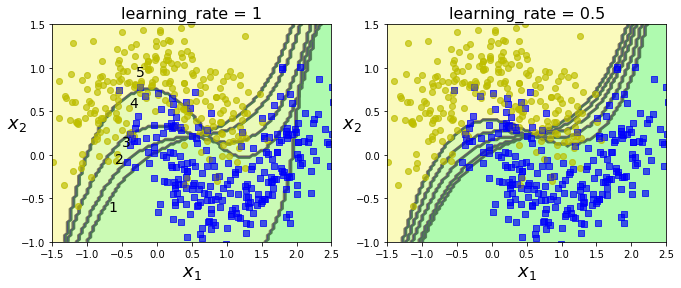

In [13]:
m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate) # 对错误分类的点增加权重
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)

plt.show()

<center> 图2 连续预测器的决策边界</center>

第一个分类器产生了许多错误实例，所以这些实例的权重得到提升。因此第二个分类器在这些实例上的表现有所提升，然后第三个、第四个......右图绘制的是相同预测器序列，唯一的差别在于学习了减半（即每次迭代仅提升一般错误分类的实例的权重）。

## 1.3 Sklearn 实现

[AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)：

``` Python
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)
```
[AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)：

``` Python
from sklearn.ensemble import AdaBoostRegressor
AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss=’linear’, random_state=None)
```

> 如果 AdaBoost 集成过拟合，可以减少估算器的数量，或是提高基础估算器的正则化程度。

以单层决策树作为基学习器创建 AdaBoost 分类器：

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

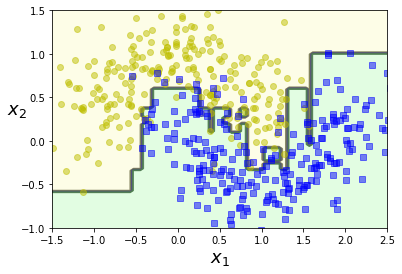

In [15]:
plot_decision_boundary(ada_clf, X, y)

<center> 图3 基于决策树的 AdaBoost 决策边界</center>

# 2. 梯度提升

另一个非常受欢迎的提升方法就是`梯度提升`（Grandient Boosting）。跟 AdaBoost 一样，梯度提升也是逐步在集成中添加预测器，每一个都对其前序做出改正。不同之处在于，它不是像 AdaBoost 那样在每个迭代中调整实例权重，而是**让新的预测器针对前一个预测器的残差进行拟合**。

## 2.1 梯度提升回归树（GBRT）

使用决策树作为基学习器来进行回归，这被称为`梯度树提升`或是`梯度提升回归树`（GBRT）。

### 2.1.1 Python 实现

In [16]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100) # 带噪声的二次训练集

In [17]:
# 首先，在训练集上拟合一个 DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [18]:
# 现在，针对第一个预测器的残差，训练第二个 DecisionTreeRegressor
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [19]:
# 然后，针对第二个预测器的残差，训练第三个 DecisionTreeRegressor
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [20]:
X_new = np.array([[0.8]])

# 现在，我们有了一个包含三棵树的集成。
# 它将所有树的预测相加，从而对新实例进行预测
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

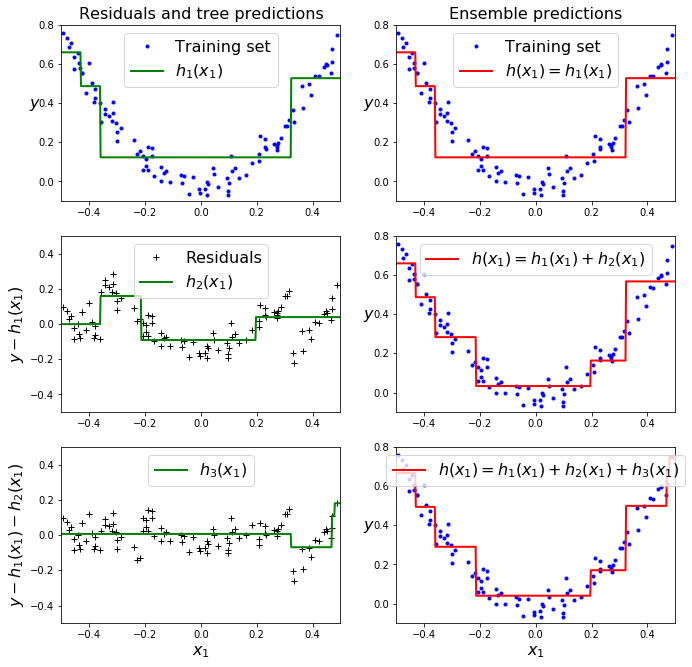

In [21]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

<center> 图4 GBRT</center>

左侧便是这三棵树单独的预测，右侧表示结成的预测。随着集成的数量增加，预测的效果也逐渐变好。

### 2.1.2 Sklearn 实现

[GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

``` Python
from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor(loss=’ls’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
```

参数设置：

warm_start=True：早期停止法（2.1.3）

subsample：用于训练每棵树的实例的比例（随机梯度提升，2.1.4）

与 RandomForestRegressor 类似，它具有控制决策树生长的超参数（max_depth、min_samples_leaf），以及控制集成训练的超参数（n_estimators、learning_rate）

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

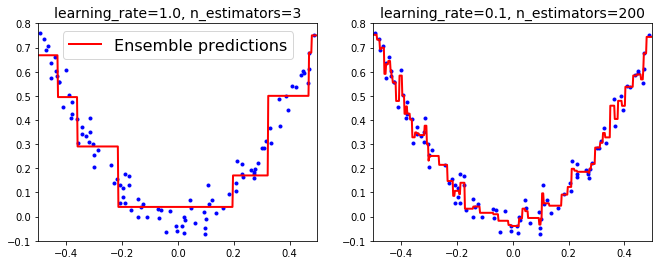

In [24]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

<center> 图5 不同学习率下的GBRT</center>

### 2.1.3 早期停止法

我们先来看一个例子，与上面一样，只是调整了学习率和迭代次数：

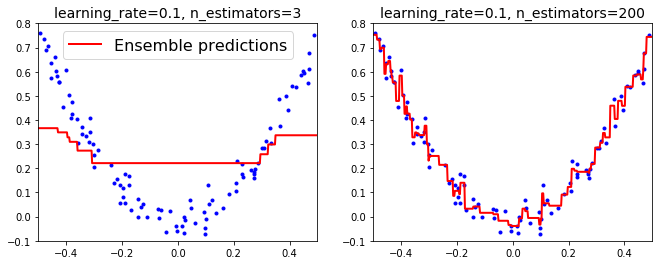

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_slow1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=42)
gbrt_slow1.fit(X, y)

gbrt_slow2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow2.fit(X, y)

plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt_slow1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow1.learning_rate, gbrt_slow1.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow2], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow2.learning_rate, gbrt_slow2.n_estimators), fontsize=14)

plt.show()

<center> 图6 GBRT集成——预测器太少和预测器太多</center>

超参数 `learning_rate` 对每棵树的贡献进行缩放。如果将其设为低值，比如 0.1 ，则需要更多的树来拟合训练集，但是预测的泛化效果通常更好。这是一种被称为`收缩`的正则化技术。如上图所示，图6 看是了用低学习率寻来呢的两个 GBRT 集成：左侧拟合训练集的树数量不足，而右侧拟合训练集的树数量过多从而导致过度拟合。

要找到树的最佳数量，可以使用`早期停止法`（在验证集误差达到最小时停止训练）。简单的实现方法就是使用 `staged_predict()` 方法：它在训练的每个阶段（一棵树时，两棵树时，等等）都对集成的预测返回一个迭代器。

以下代码训练了一个拥有 120 颗树的 GBRT 集成，然后测量每个训练阶段的验证误差，从而找到树的最优数量，最后使用最优树数训练了一个 GBRT 集成：

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)] # staged_predict()
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=56,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
min_error = np.min(errors)

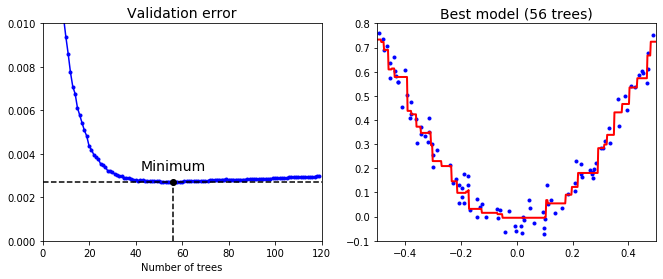

In [28]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.show()

<center> 图7 通过早期停止法调整树的数量</center>

事实上，要实现早期停止法，不一定需要先训练大量的树，然后再回头找最优的数量。在 Sklearn 中，通过设置 `warm_start=True`，当 fit() 方法被调用时，Sklearn 会保留现有的树，从而允许增量训练。

以下代码会在验证误差连续 5 次迭代未改善时，直接停止训练：

In [29]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [30]:
print(gbrt.n_estimators)

61


In [31]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


### 2.1.4 随机梯度提升

GradientBoostingRegressor 类还可以支持超参数 `subsample`，用于制定训练每棵树的实例的比例，数据通过随机抽取，择业时用更高的偏差换取了更低的偏差。<sup>[3]

# 参考资料

[1] Aurelien Geron, 王静源, 贾玮, 边蕤, 邱俊涛. 机器学习实战：基于 Scikit-Learn 和 TensorFlow[M]. 北京: 机械工业出版社, 2018: 174-175.

[2] 周志华. 机器学习[M]. 北京: 清华大学出版社, 2016: 173-177.

[3] Aurelien Geron, 王静源, 贾玮, 边蕤, 邱俊涛. 机器学习实战：基于 Scikit-Learn 和 TensorFlow[M]. 北京: 机械工业出版社, 2018: 175-180.